# Metodo local

In [1]:
import pandas as pd

In [14]:
df2 = pd.read_csv('../datasets/clase12/dnrpa-robos-recuperos-autos-202201.csv')
df2.head(5)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994.0,NaN,FURGON VIDRID.C/ASIE,...,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000.0,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,6,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994.0,NaN,FUR.VIDRIADO C/ASIEN,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971,PERU,100,2,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-10,1992-03-27,1119,MORON Nº 03,Buenos Aires,Importado,1991.0,NaN,RURAL 4 PTAS.,...,Privado,Física,HAEDO,BUENOS AIRES,No identificado,1982,ARGENTINA,50,6,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-24,2000-11-01,1118,QUILMES Nº 2,Buenos Aires,Nacional,2000.0,NaN,SEDAN 4 PUERTAS,...,Privado,Física,QUILMES OESTE,BUENOS AIRES,Masculino,1947,ARGENTINA,100,6,ARG


In [3]:
df2.shape

(2676, 25)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tramite_tipo                    2676 non-null   object 
 1   tramite_fecha                   2676 non-null   object 
 2   fecha_inscripcion_inicial       2676 non-null   object 
 3   registro_seccional_codigo       2676 non-null   int64  
 4   registro_seccional_descripcion  2676 non-null   object 
 5   registro_seccional_provincia    2676 non-null   object 
 6   automotor_origen                2676 non-null   object 
 7   automotor_anio_modelo           2671 non-null   float64
 8   automotor_tipo_codigo           2601 non-null   object 
 9   automotor_tipo_descripcion      2676 non-null   object 
 10  automotor_marca_codigo          2644 non-null   object 
 11  automotor_marca_descripcion     2676 non-null   object 
 12  automotor_modelo_codigo         26

<AxesSubplot:xlabel='tramite_fecha'>

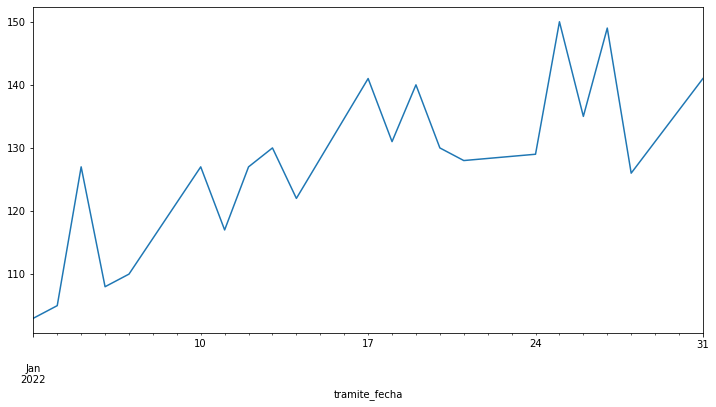

In [5]:
df2['tramite_fecha']=pd.to_datetime(df2['tramite_fecha']) # Formato datetime python 
monthly_accidents =df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()
monthly_accidents.plot.line(figsize=(12,6))

# Marca mas robada

<AxesSubplot:title={'center':'Marcas mas robadas'}, ylabel='Frecuencia'>

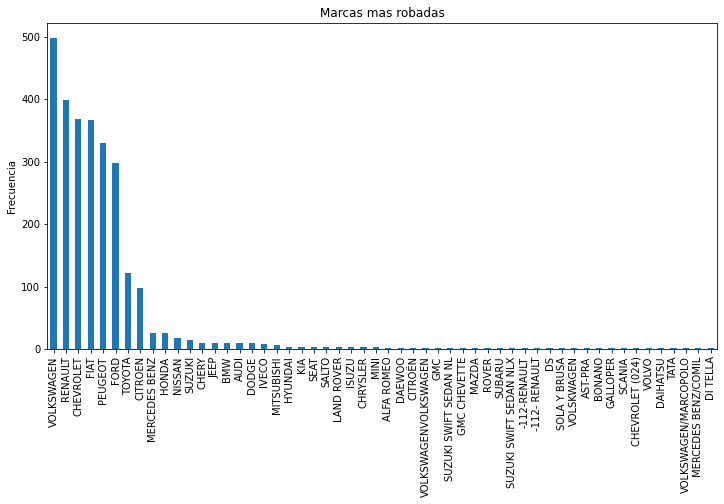

In [6]:
df2['automotor_marca_descripcion'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Marcas mas robadas')

<AxesSubplot:title={'center':'Modelos mas robadas'}, ylabel='Frecuencia'>

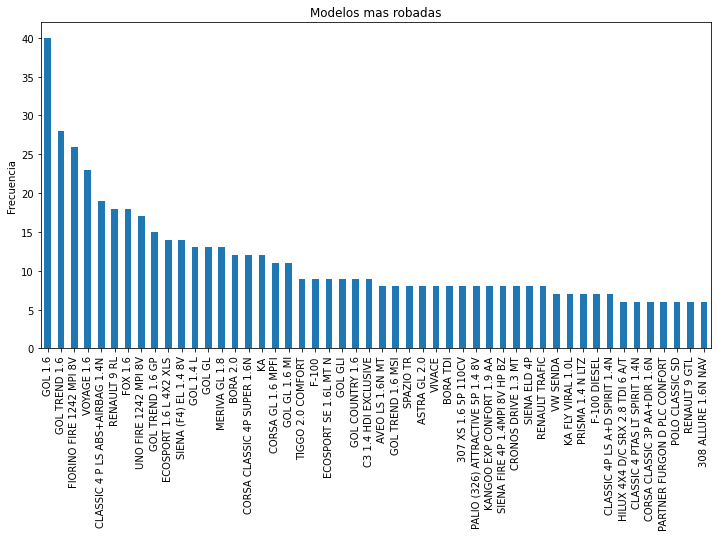

In [7]:
df2['automotor_modelo_descripcion'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Modelos mas robadas')

<AxesSubplot:title={'center':'Robos por genero'}, ylabel='Frecuencia'>

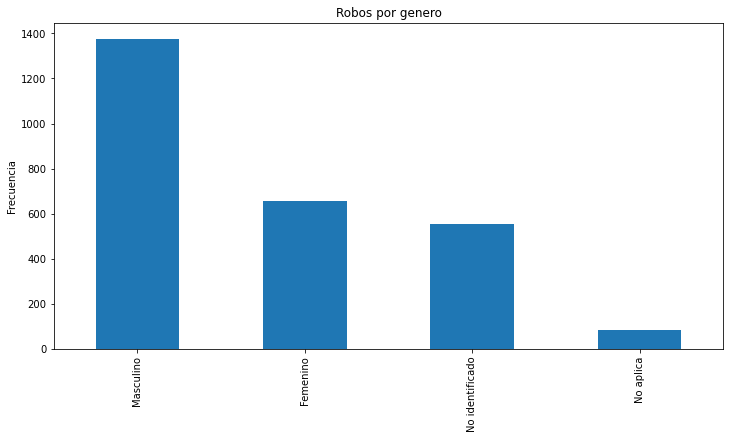

In [8]:
df2['titular_genero'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Robos por genero')

<AxesSubplot:title={'center':'Procedencia del titular'}, ylabel='Frecuencia'>

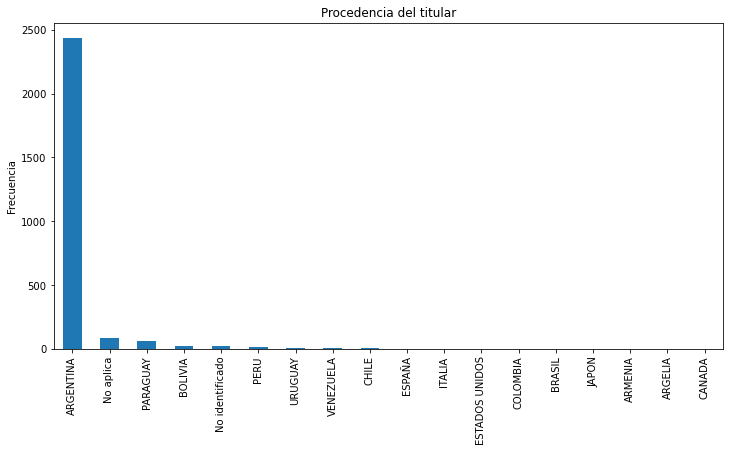

In [9]:
df2['titular_pais_nacimiento'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

<AxesSubplot:title={'center':'Procedencia del titular'}, ylabel='Frecuencia'>

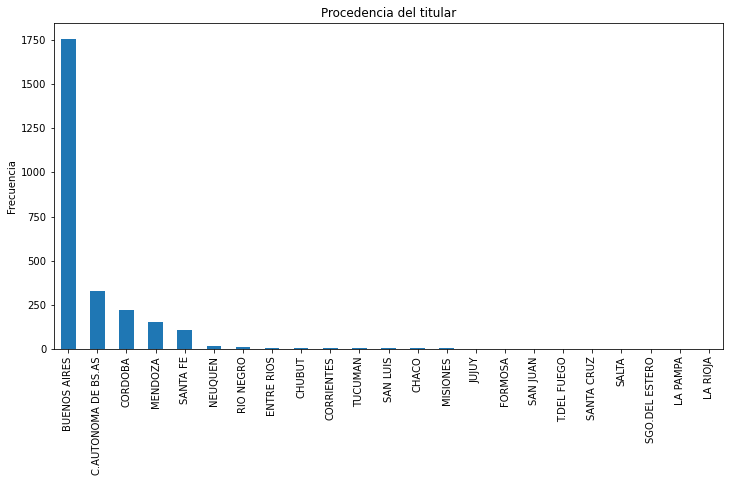

In [10]:
df2['titular_domicilio_provincia'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

# Actividad colaborativa

## SQL

In [15]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
conn= sql.connect('../datasets/clase12/nba_salary.sqlite')
conn

In [16]:
# Visualizar las tablas
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor. fetchall())

[('NBA_season1718_salary',), ('Seasons_Stats',)]


In [17]:
df_salary = pd.read_sql_query("SELECT * FROM NBA_season1718_salary", conn)
df_salary.head()

,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0


In [18]:
df_stats = pd.read_sql_query("SELECT * FROM Seasons_Stats", conn)
df_stats.head()

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# JSON

In [19]:
# De una URL
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
df.head(10)

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [20]:
# Miremos este caso especial
df = pd.read_json('../datasets/clase12/nested_json.json')
df # tenemos un JSON nested

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [21]:
import json
# Normalizar los datos
with open('../datasets/clase12/nested_json.json','r') as f:
    data = json.loads(f.read())# Flatten data
df_nested_list = pd.json_normalize(data, record_path =['students'])
df_nested_list

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [22]:
# Combinando
df_nested_list = pd.json_normalize(
    data, 
    record_path =['students'], 
    meta=['school_name', 'class']
)
df_nested_list

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1


In [23]:
import requests

In [24]:
# De API
response = requests.get('http://api.open-notify.org/astros.json')
print(response)

<Response [200]>


In [25]:
response.json()

{'message': 'success',
 'people': [{'name': 'Sergey Prokopyev', 'craft': 'ISS'},
  {'name': 'Dmitry Petelin', 'craft': 'ISS'},
  {'name': 'Frank Rubio', 'craft': 'ISS'},
  {'name': 'Nicole Mann', 'craft': 'ISS'},
  {'name': 'Josh Cassada', 'craft': 'ISS'},
  {'name': 'Koichi Wakata', 'craft': 'ISS'},
  {'name': 'Anna Kikina', 'craft': 'ISS'},
  {'name': 'Fei Junlong', 'craft': 'Shenzhou 15'},
  {'name': 'Deng Qingming', 'craft': 'Shenzhou 15'},
  {'name': 'Zhang Lu', 'craft': 'Shenzhou 15'}],
 'number': 10}

In [26]:
pd.DataFrame(response.json()['people'])

,name,craft
0,Sergey Prokopyev,ISS
1,Dmitry Petelin,ISS
2,Frank Rubio,ISS
3,Nicole Mann,ISS
4,Josh Cassada,ISS
5,Koichi Wakata,ISS
6,Anna Kikina,ISS
7,Fei Junlong,Shenzhou 15
8,Deng Qingming,Shenzhou 15
9,Zhang Lu,Shenzhou 15


# APIs

In [ ]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=7ecca0a570dbdae27d5ffb7491b366d6d83b83b36c59edde3ddb4e625078c3d0
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq()
keywords = ["barcelona", "Copperfield", "Madrid"]
pytrends.build_payload(keywords, cat=0, geo='', gprop='') # Datos de los ultimos 5 años
stop_queries = pytrends.interest_over_time()[keywords]
stop_queries.head()

,barcelona,Copperfield,Madrid
date,,,
2017-02-26,33,0,49
2017-03-05,59,0,44
2017-03-12,31,0,43
2017-03-19,29,0,31
2017-03-26,22,0,29


In [ ]:
stop_queries.shape

(261, 3)

In [ ]:
pytrends.build_payload?

# yfinance

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
pfe = yf.Ticker('PFE')
pfe.info

{'52WeekChange': 0.41644406,
 'SandP52WeekChange': 0.123744845,
 'address1': '235 East 42nd Street',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 47.63,
 'askSize': 1800,
 'averageDailyVolume10Day': 31897490,
 'averageVolume': 41594635,
 'averageVolume10days': 31897490,
 'beta': 0.684733,
 'beta3Year': None,
 'bid': 47.65,
 'bidSize': 1200,
 'bookValue': 13.49,
 'category': None,
 'circulatingSupply': None,
 'city': 'New York',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 47.72,
 'currentRatio': None,
 'dateShortInterest': 1643587200,
 'dayHigh': 48.03,
 'dayLow': 45.74,
 'debtToEquity': 52.496,
 'dividendRate': 1.6,
 'dividendYield': 0.0335,
 'earningsGrowth': 4.575,
 'earningsQuarterlyGrowth': 4.712,
 'ebitda': 31947665408,
 'ebitdaMargins': 0.39301997,
 'enterpriseToEbitda': 8.711,
 'enterpriseToRevenue': 3.424,
 'enterpriseValue': 278298001408,
 'exDividendDate': 1643241600,
 'exchange':

In [ ]:
# Scar los dividendos
pfe.actions

,Dividends,Stock Splits
Date,,
1972-08-29,0.003163,0.0
1972-11-28,0.004151,0.0
1973-02-28,0.003163,0.0
1973-05-30,0.003163,0.0
1973-08-28,0.003163,0.0
...,...,...
2021-01-28,0.390000,0.0
2021-05-06,0.390000,0.0
2021-07-29,0.390000,0.0


In [ ]:
pfe.history?

In [ ]:
# period: Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Tambien se puede colocar start, end 
hist = pfe.history(period="6mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-26,46.928141,47.380697,46.534612,46.613319,29029300,0.0,0
2021-08-27,46.603480,46.731378,45.777073,45.845940,32874400,0.0,0
2021-08-30,45.452413,46.396878,45.413060,46.003349,25774400,0.0,0
2021-08-31,45.964000,46.377202,45.186782,45.324516,34547800,0.0,0
2021-09-01,45.442572,45.511439,44.685032,45.295002,32900100,0.0,0
...,...,...,...,...,...,...,...
2022-02-18,48.779999,49.520000,48.200001,48.529999,26939500,0.0,0
2022-02-22,47.540001,48.310001,47.349998,47.529999,34814800,0.0,0
2022-02-23,47.590000,48.160000,46.779999,46.869999,25793000,0.0,0


# Lectura en serie de datos

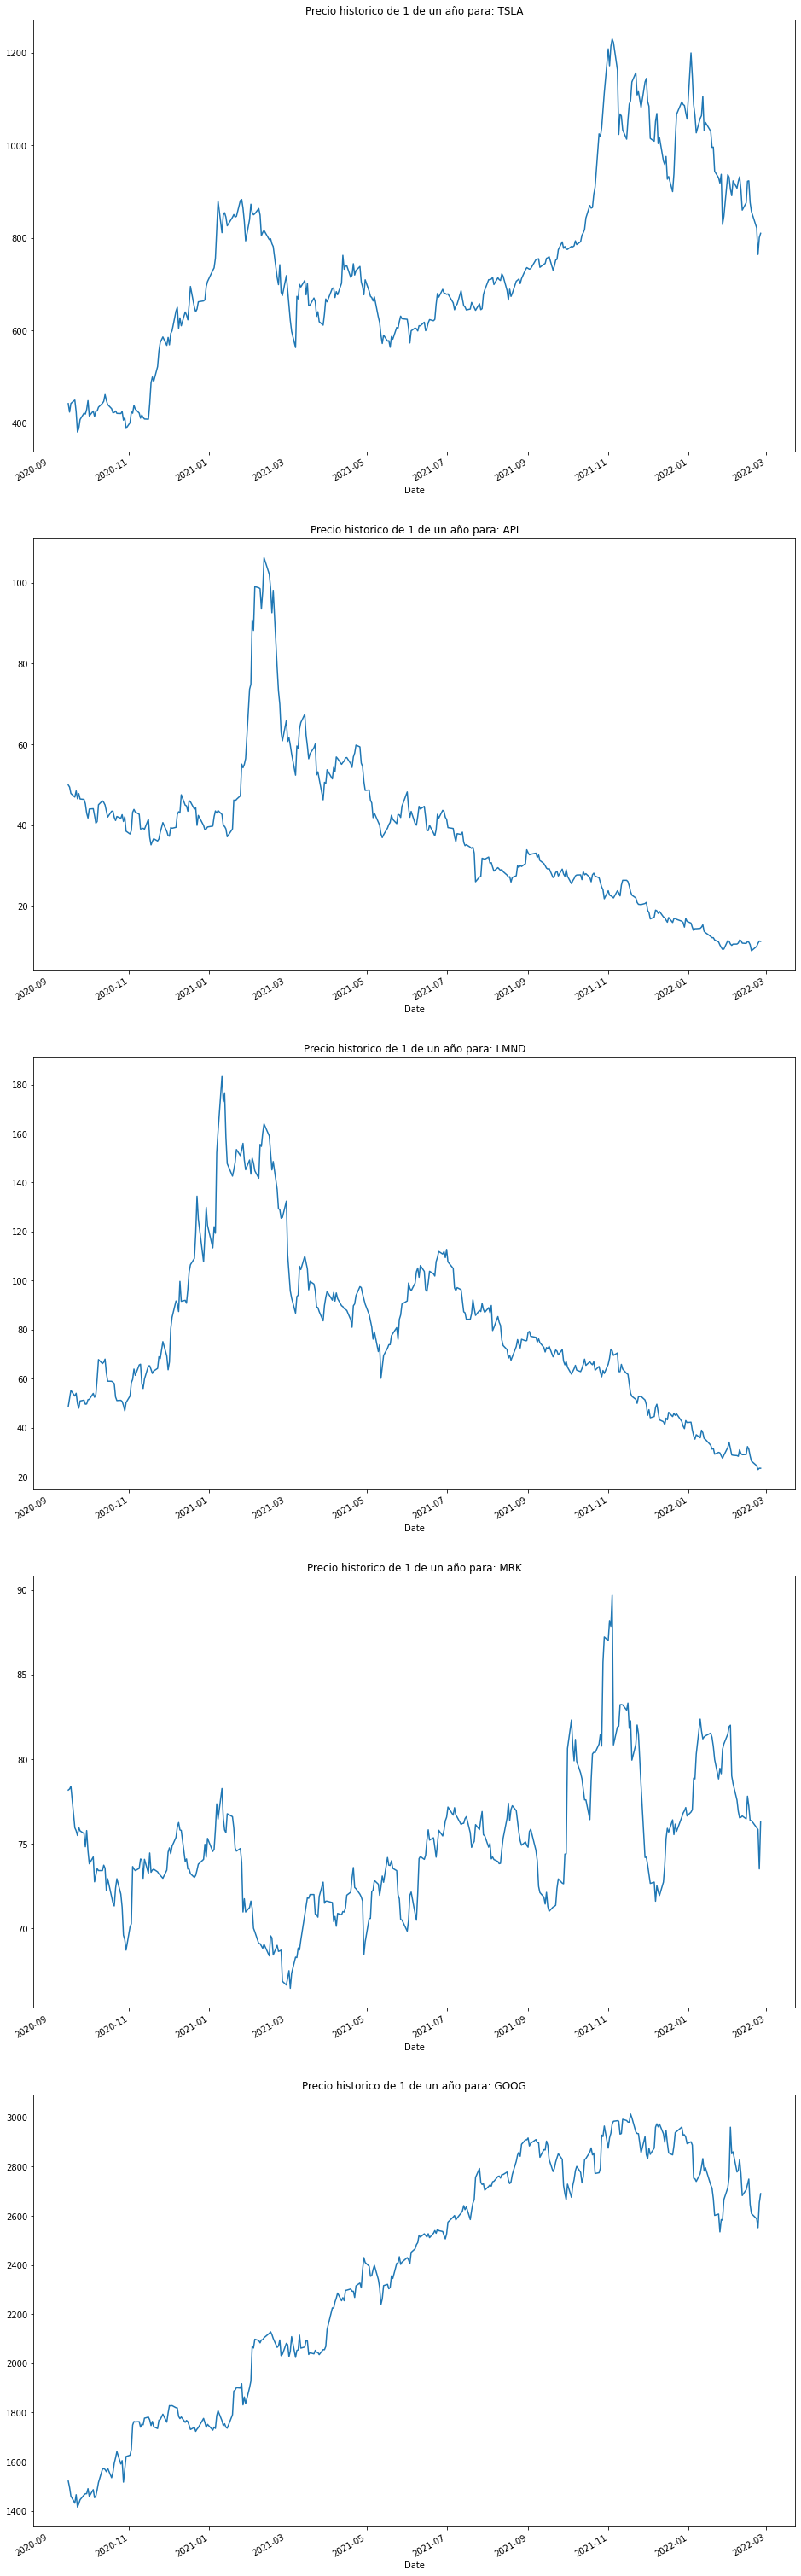

In [ ]:
tickers = ['TSLA', 'API', 'LMND','MRK','GOOG']
import matplotlib.pyplot as plt
for i,ticker in enumerate(tickers):
  current_ticker = yf.Ticker(ticker)
  plt.subplot(len(tickers),1,i+1)
  current_ticker.history(period='365d')['Close'].plot(figsize=   (16,60), title='Precio historico de 1 de un año para: '+ticker)

In [ ]:
# Informacion del primero
ticker = tickers[0]
yf_info = yf.Ticker(ticker).info
print(ticker)

TSLA


In [ ]:
# Creciemito de 52 semanas
yf_info['52WeekChange']

0.1272775

In [ ]:
# Sacando algunas estadisticas de interes
stock_52w_change = []
profitsMargins = []
tickers = ['NVS','JNJ','ABBV','AMGN']
for ticker in tickers:
  print(ticker)
  current_ticker = yf.Ticker(ticker)
  current_ticker_info = current_ticker.info
  stock_52w_change.append(current_ticker_info['52WeekChange'])
  profitsMargins.append(current_ticker_info['profitMargins'])

NVS
JNJ
ABBV
AMGN


In [ ]:
stock_52w_change

[0.0020582676, 0.041928172, 0.3793931, -4.4047832e-05]

In [ ]:
profitsMargins

[0.45428002, 0.22264, 0.20538001, 0.22684]

In [ ]:
import pandas as pd
df = pd.DataFrame([stock_52w_change, profitsMargins], columns=tickers, index={'52w change', 'profitMargins'})
print(df)

                    NVS       JNJ      ABBV      AMGN
profitMargins  0.002058  0.041928  0.379393 -0.000044
52w change     0.454280  0.222640  0.205380  0.226840


Text(0.5, 1.0, 'Comparando margenes de profit y tasas de crecimiento en 52 semanas para stocks farmacias')

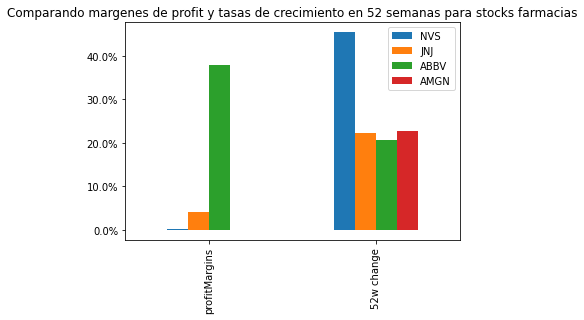

In [ ]:
import matplotlib.ticker as mtick
ax = df.plot.bar()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_title('Comparando margenes de profit y tasas de crecimiento en 52 semanas para stocks farmacias')